In [132]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport as Prt

In [133]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
data = pd.read_csv('/content/sample_data/Steel_industry_data.csv')

In [135]:
data.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [137]:
profile = Prt(data, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [138]:
data = data.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [139]:
data[data.duplicated()]

Empty DataFrame
Columns: [date, Usage_kWh, Lagging_Current_Reactive_Power_kVarh, Leading_Current_Reactive_Power_kVarh, CO2, Lagging_Current_Power_Factor, Leading_Current_Power_Factor, NSM, WeekStatus, Day_of_week, Load_Type]
Index: []

In [140]:
# correlation

In [141]:
corr_data = data.corr()
corr_data

Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive_Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2                                    0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   
NSM                                    0.234610   

                                      Lagging_Current_Reactive_Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive_Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2                                                               0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   
NSM                                                               0.082662   

                                      Leading_Current_Reactive_Power_kVarh  \
Usage_kWh                                                        -0.324922   
Lagging_Current_Reactive_Power_kVarh                             -0.405142   
Leading_Current_Reactive_Power_kVarh                              1.000000   
CO2                                                              -0.332777   
Lagging_Current_Power_Factor                                      0.526770   
Leading_Current_Power_Factor                                     -0.944039   
NSM                                                               0.371605   

                                           CO2  Lagging_Current_Power_Factor  \
Usage_kWh                             0.988180                      0.385960   
Lagging_Current_Reactive_Power_kVarh  0.886948                      0.144534   
Leading_Current_Reactive_Power_kVarh -0.332777                      0.526770   
CO2                                   1.000000                      0.379605   
Lagging_Current_Power_Factor          0.379605                      1.000000   
Leading_Current_Power_Factor          0.360019                     -0.519967   
NSM                                   0.231726                      0.565270   

                                      Leading_Current_Power_Factor       NSM  
Usage_kWh                                                 0.353566  0.234610  
Lagging_Current_Reactive_Power_kVarh                      0.407716  0.082662  
Leading_Current_Reactive_Power_kVarh                     -0.944039  0.371605  
CO2                                                       0.360019  0.231726  
Lagging_Current_Power_Factor                             -0.519967  0.565270  
Leading_Current_Power_Factor                              1.000000 -0.360563  
NSM                                                      -0.360563  1.000000

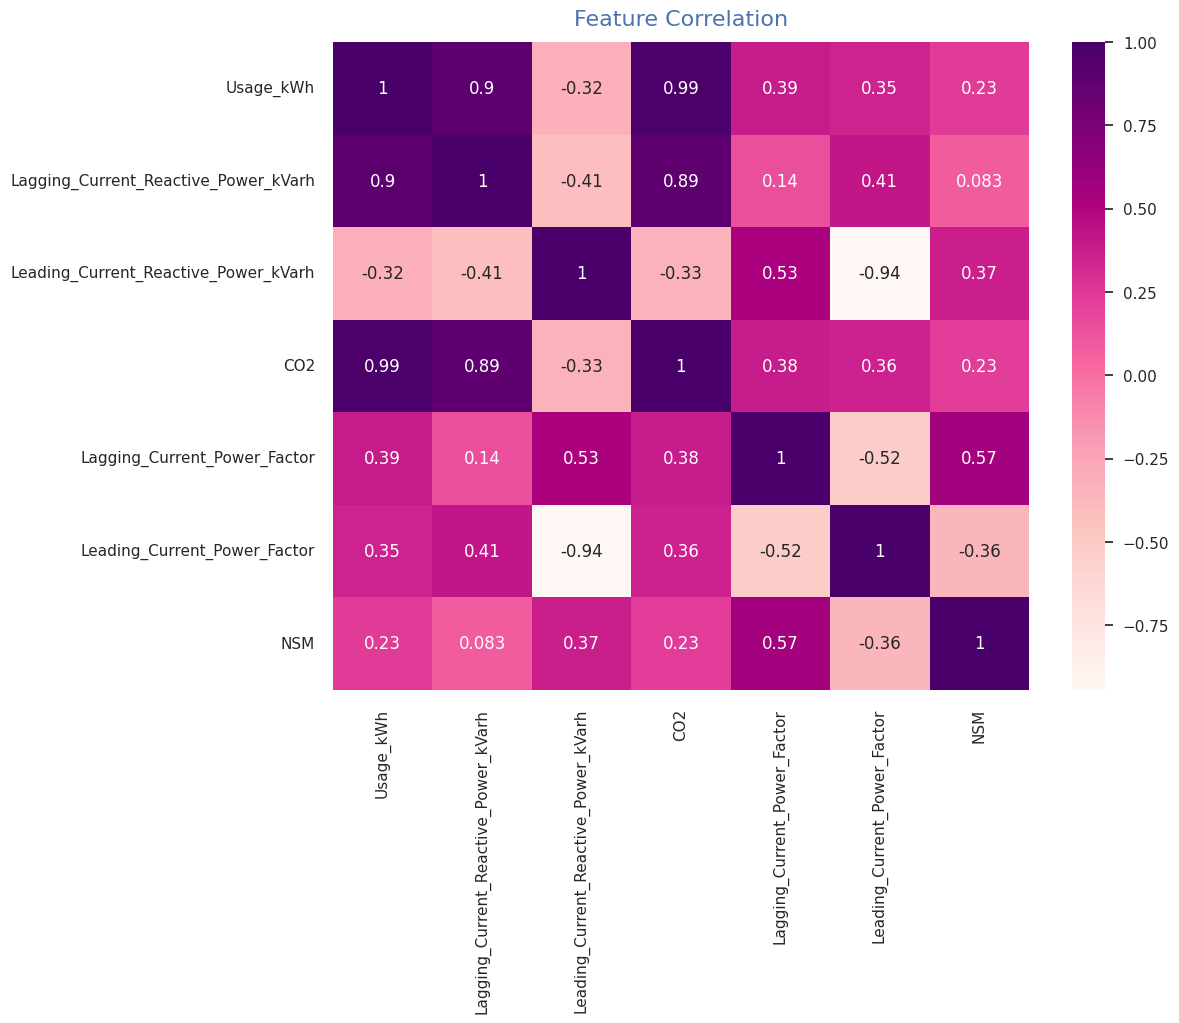

In [142]:
#correlation
plt.figure(figsize = (10,8))
sns.heatmap(corr_data, annot = True, cmap = 'RdPu')
plt.title("Feature Correlation", fontsize = 16, color = 'b', pad = 12, loc = 'center')
plt.show()

In [143]:
# data analysis

In [144]:
# most energy consumption based on time

col = 'Usage_kWh'
high_cons = pd.pivot_table(data, index = 'date', 
                           values = col, aggfunc = {col : np.max})
high_cons.head(10)

Usage_kWh
date                       
01/01/2018 00:00       3.42
01/01/2018 00:15       3.17
01/01/2018 00:30       4.00
01/01/2018 00:45       3.24
01/01/2018 01:00       3.31
01/01/2018 01:15       3.82
01/01/2018 01:30       3.28
01/01/2018 01:45       3.60
01/01/2018 02:00       3.60
01/01/2018 02:15       3.28

In [145]:
df1 = high_cons[10:]

In [146]:
df1

Usage_kWh
date                       
01/01/2018 02:30       3.78
01/01/2018 02:45       3.46
01/01/2018 03:00       3.24
01/01/2018 03:15       3.96
01/01/2018 03:30       3.31
...                     ...
31/12/2018 22:45       3.82
31/12/2018 23:00       3.85
31/12/2018 23:15       3.74
31/12/2018 23:30       3.78
31/12/2018 23:45       3.78

[35030 rows x 1 columns]

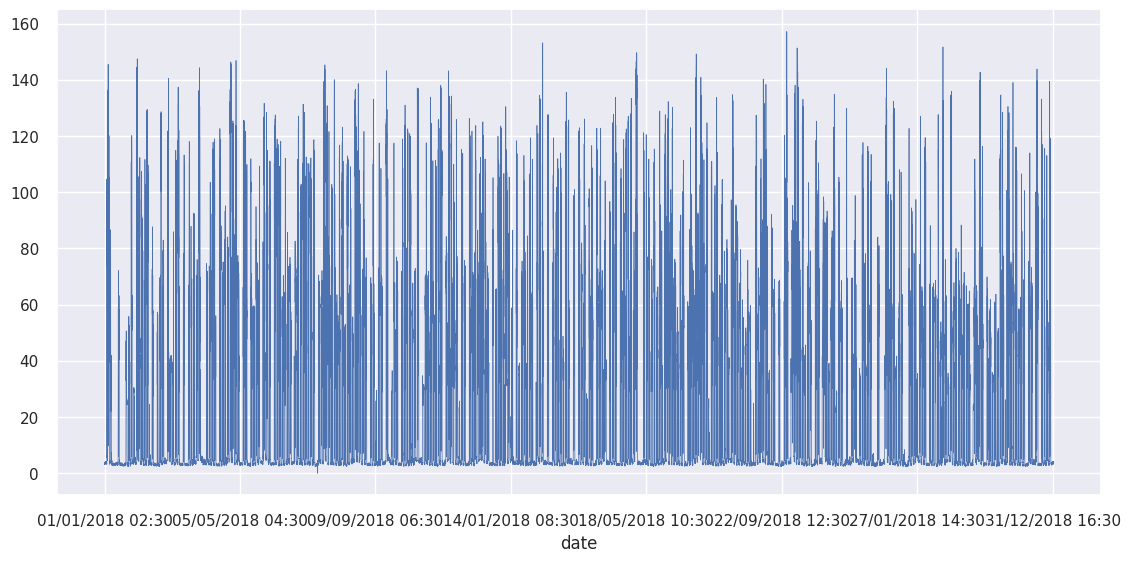

In [147]:
sns.set(rc={'figure.figsize':(12, 6)})

df1['Usage_kWh'].plot(linewidth=0.5);
#sns.plt.show()

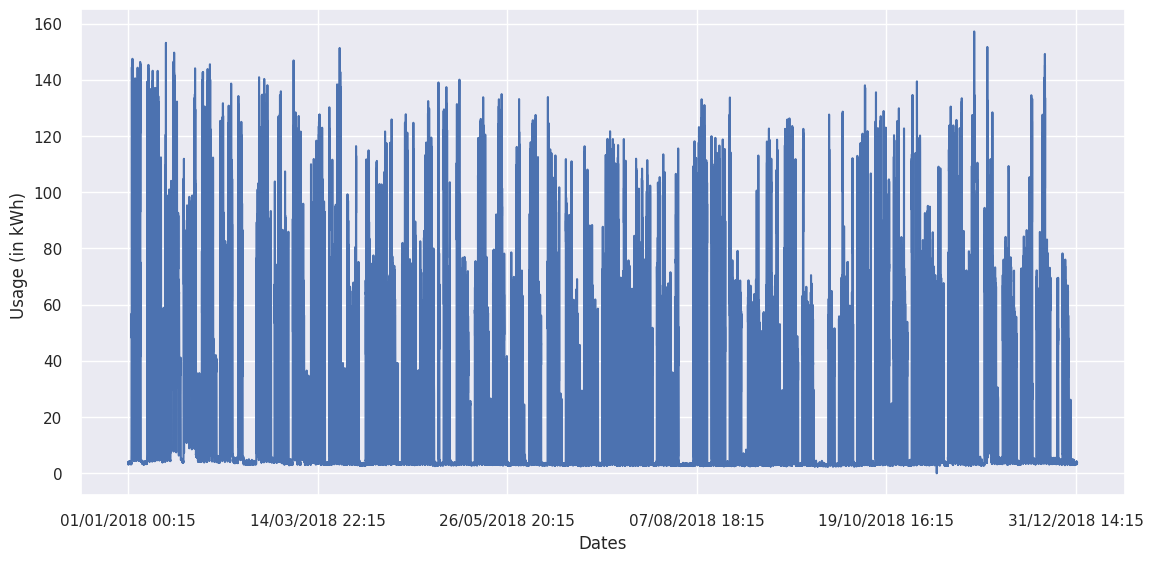

In [148]:
#all data
plt.plot(data.date, data.Usage_kWh)
plt.xticks(np.arange(0, 35040, step = 7000))
plt.xlabel('Dates')
plt.ylabel('Usage (in kWh) ')
plt.show()

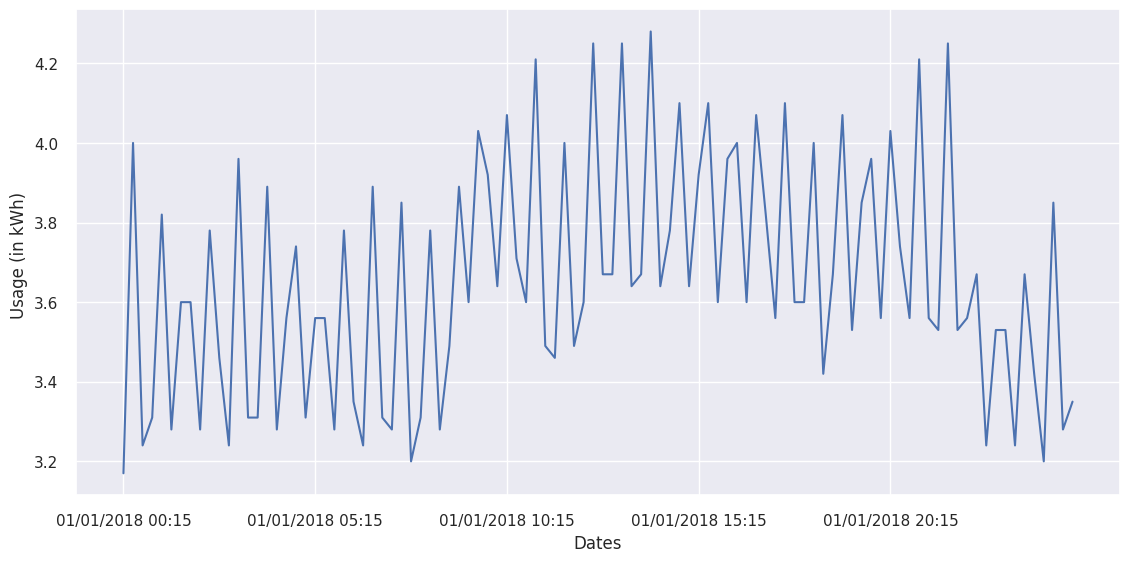

In [149]:
# first 100 data
plt.plot(data.date[:100], data.Usage_kWh[:100])
plt.xticks(np.arange(0, 100, step = 20))
plt.xlabel('Dates')
plt.ylabel('Usage (in kWh) ')
plt.show()

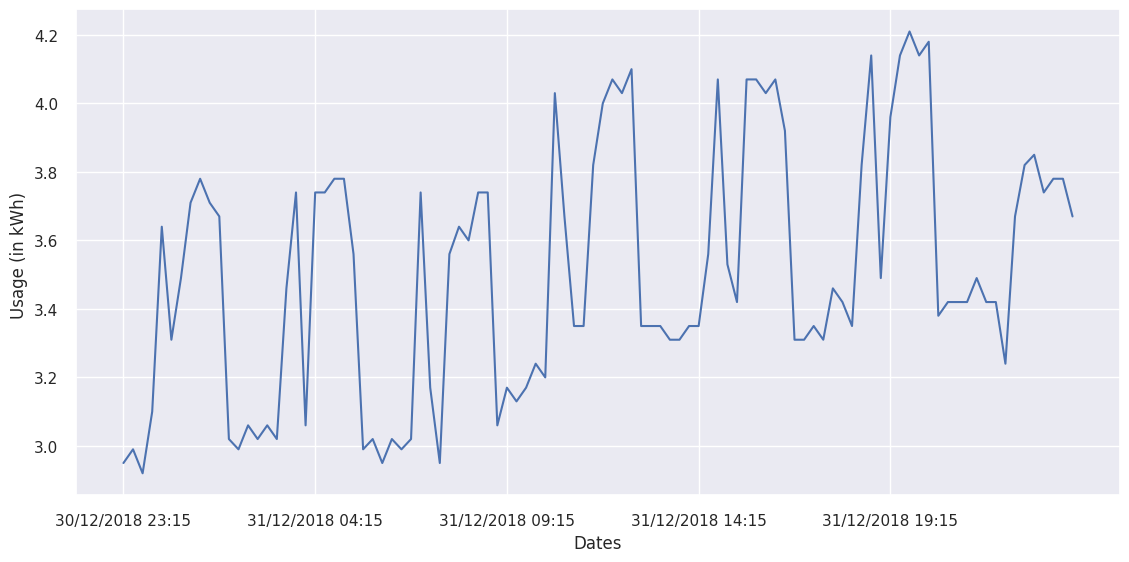

In [150]:
# last 100 data
plt.plot(data.date[34940:], data.Usage_kWh[34940:])
plt.xticks(np.arange(0, 100, step = 20))
plt.xlabel('Dates')
plt.ylabel('Usage (in kWh) ')
plt.show()

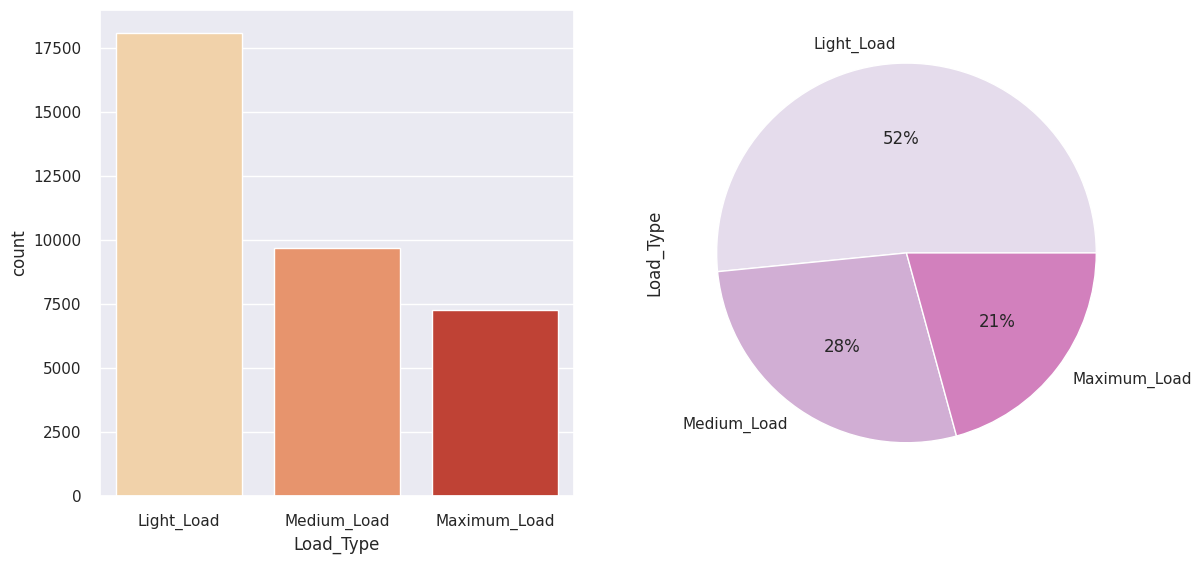

In [151]:
# Load Type
fig, ax =plt.subplots(1,2, figsize=(12,6))
x =data['Load_Type'].value_counts() 
sns.countplot(data=data, x="Load_Type",palette = 'OrRd', ax=ax[0])
c = sns.color_palette('PuRd')
x.plot(kind='pie' ,colors = c, autopct='%1.0f%%' , ax=ax[1])
fig.show()

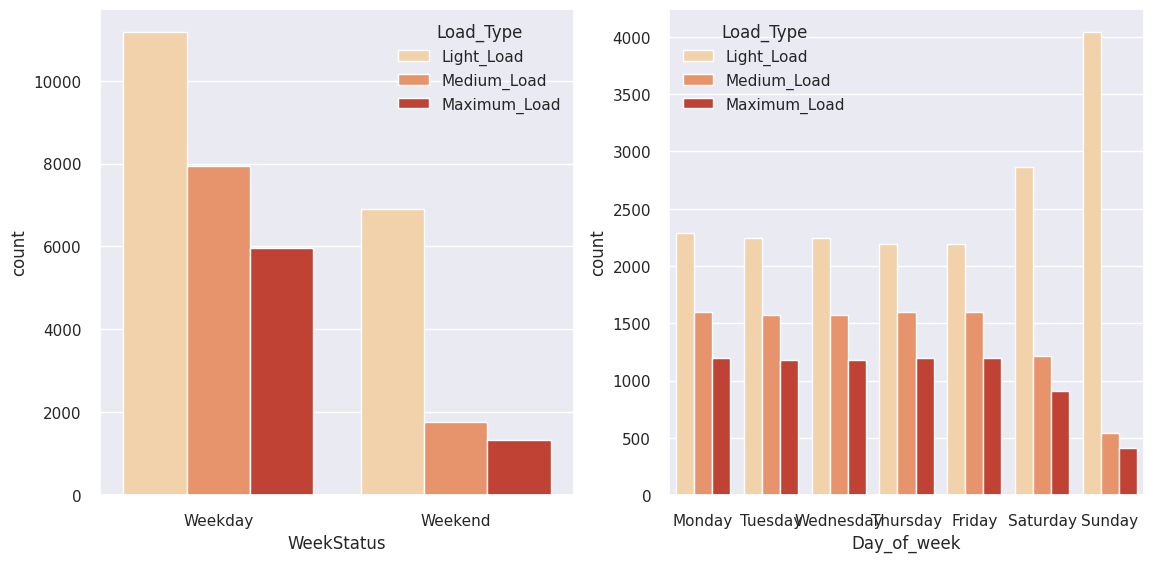

In [152]:
# load type vs week day and weekends
fig, ax =plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=data, x="WeekStatus", hue="Load_Type",palette='OrRd', ax=ax[0])
sns.countplot(data=data, x="Day_of_week", hue="Load_Type",palette='OrRd', ax=ax[1])
fig.show()

In [153]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (35040, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    11 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['date']
Number of All Scatter Plots = 21


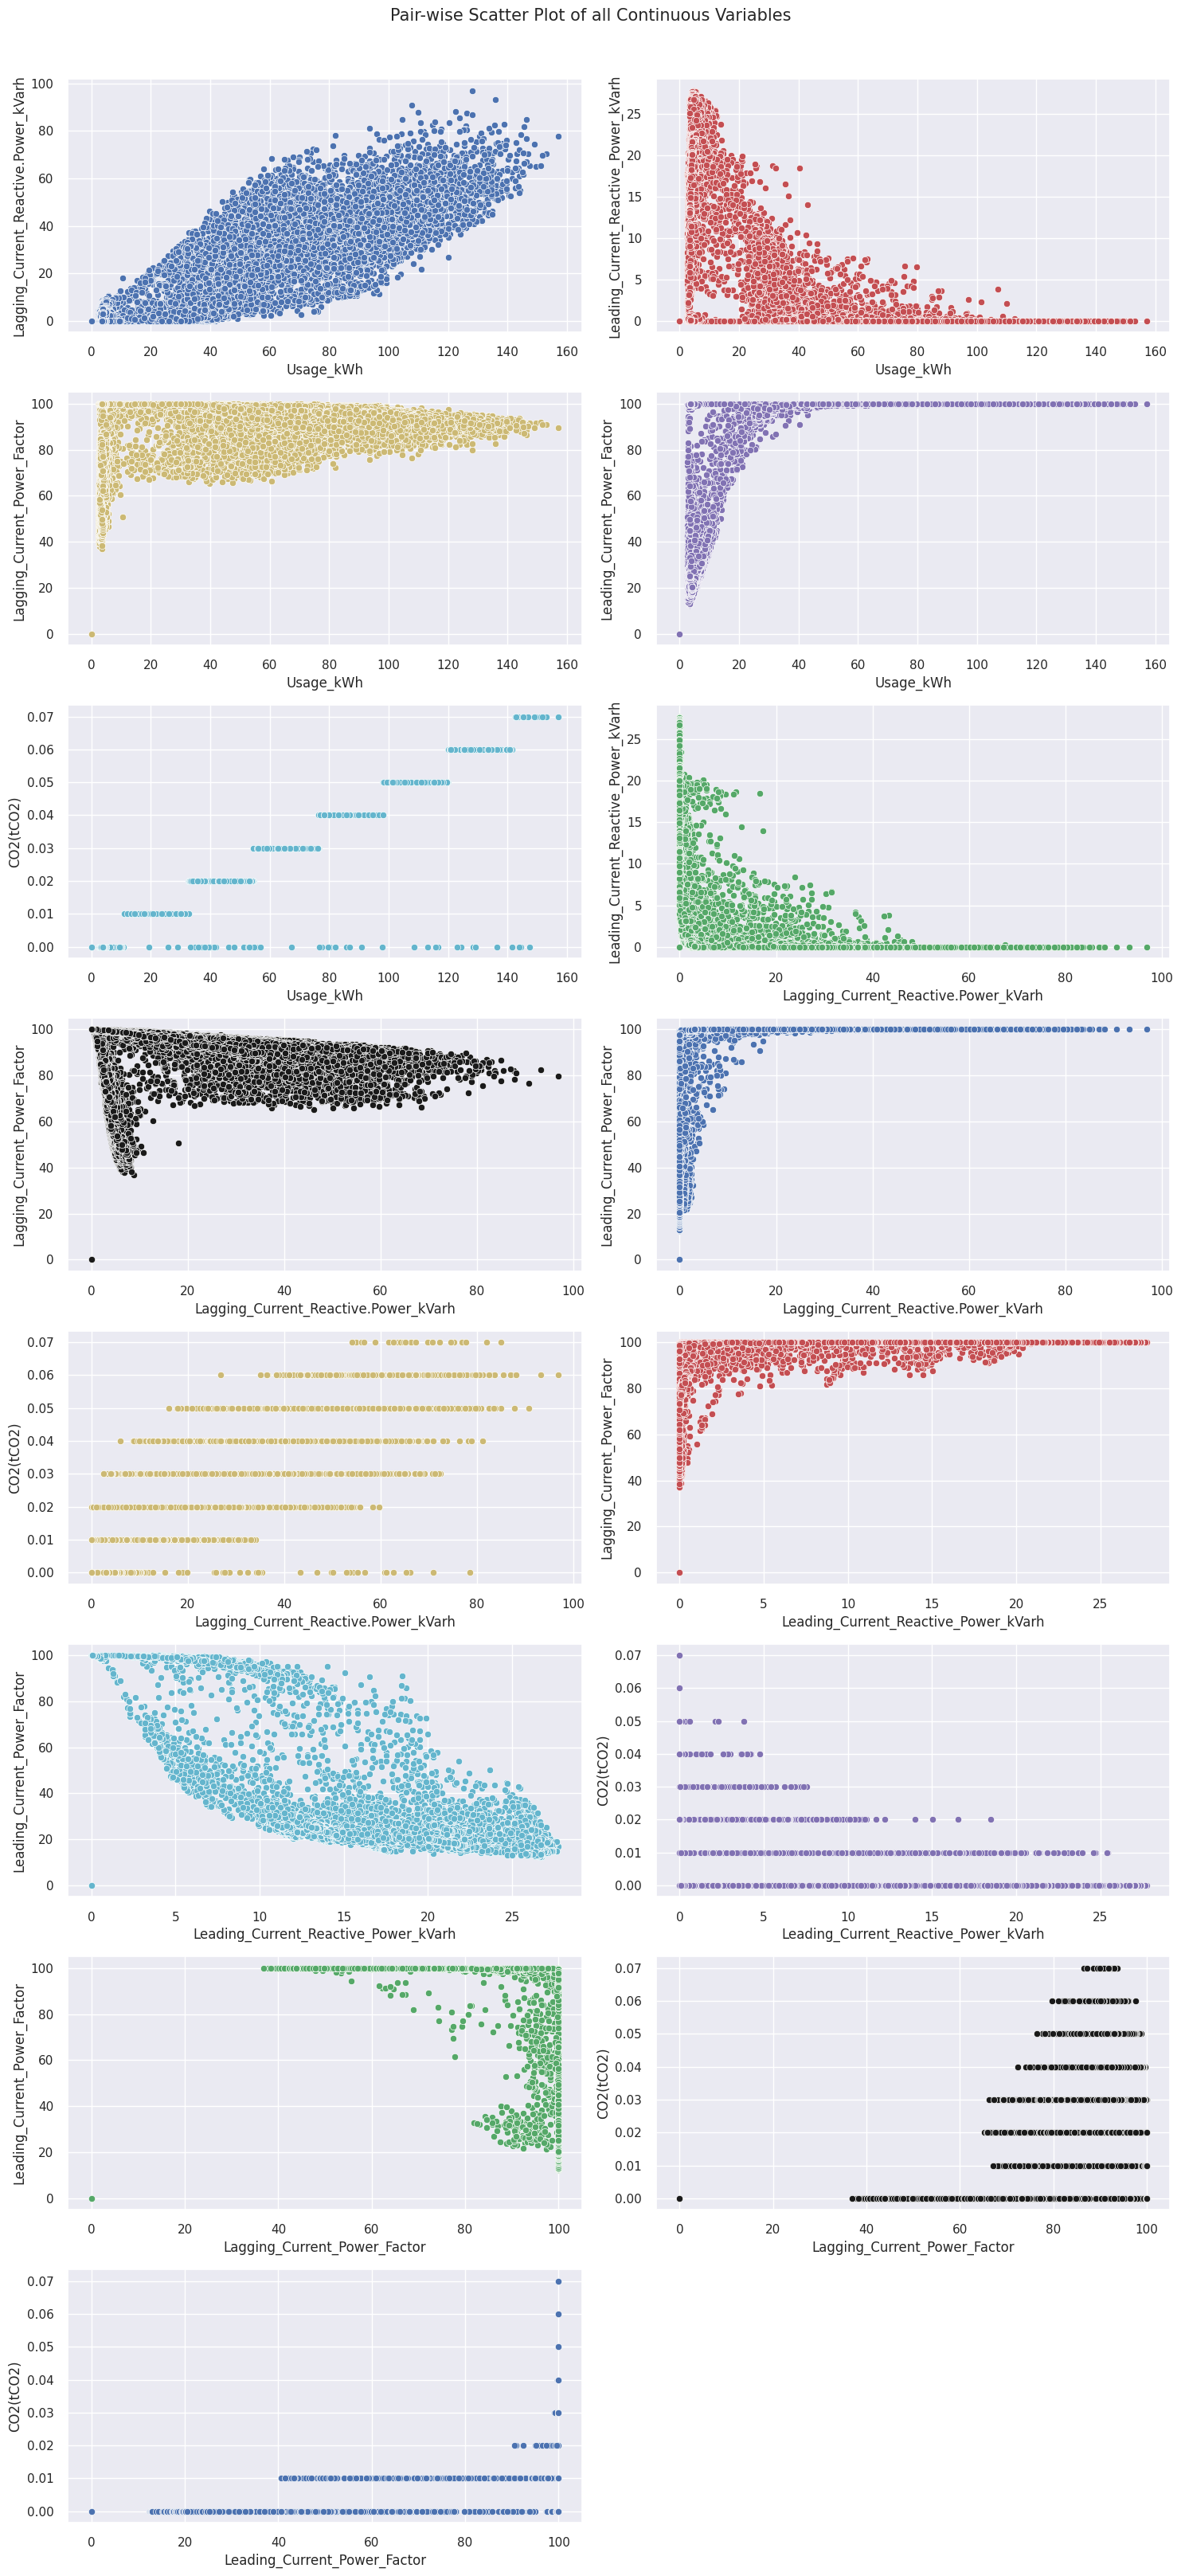

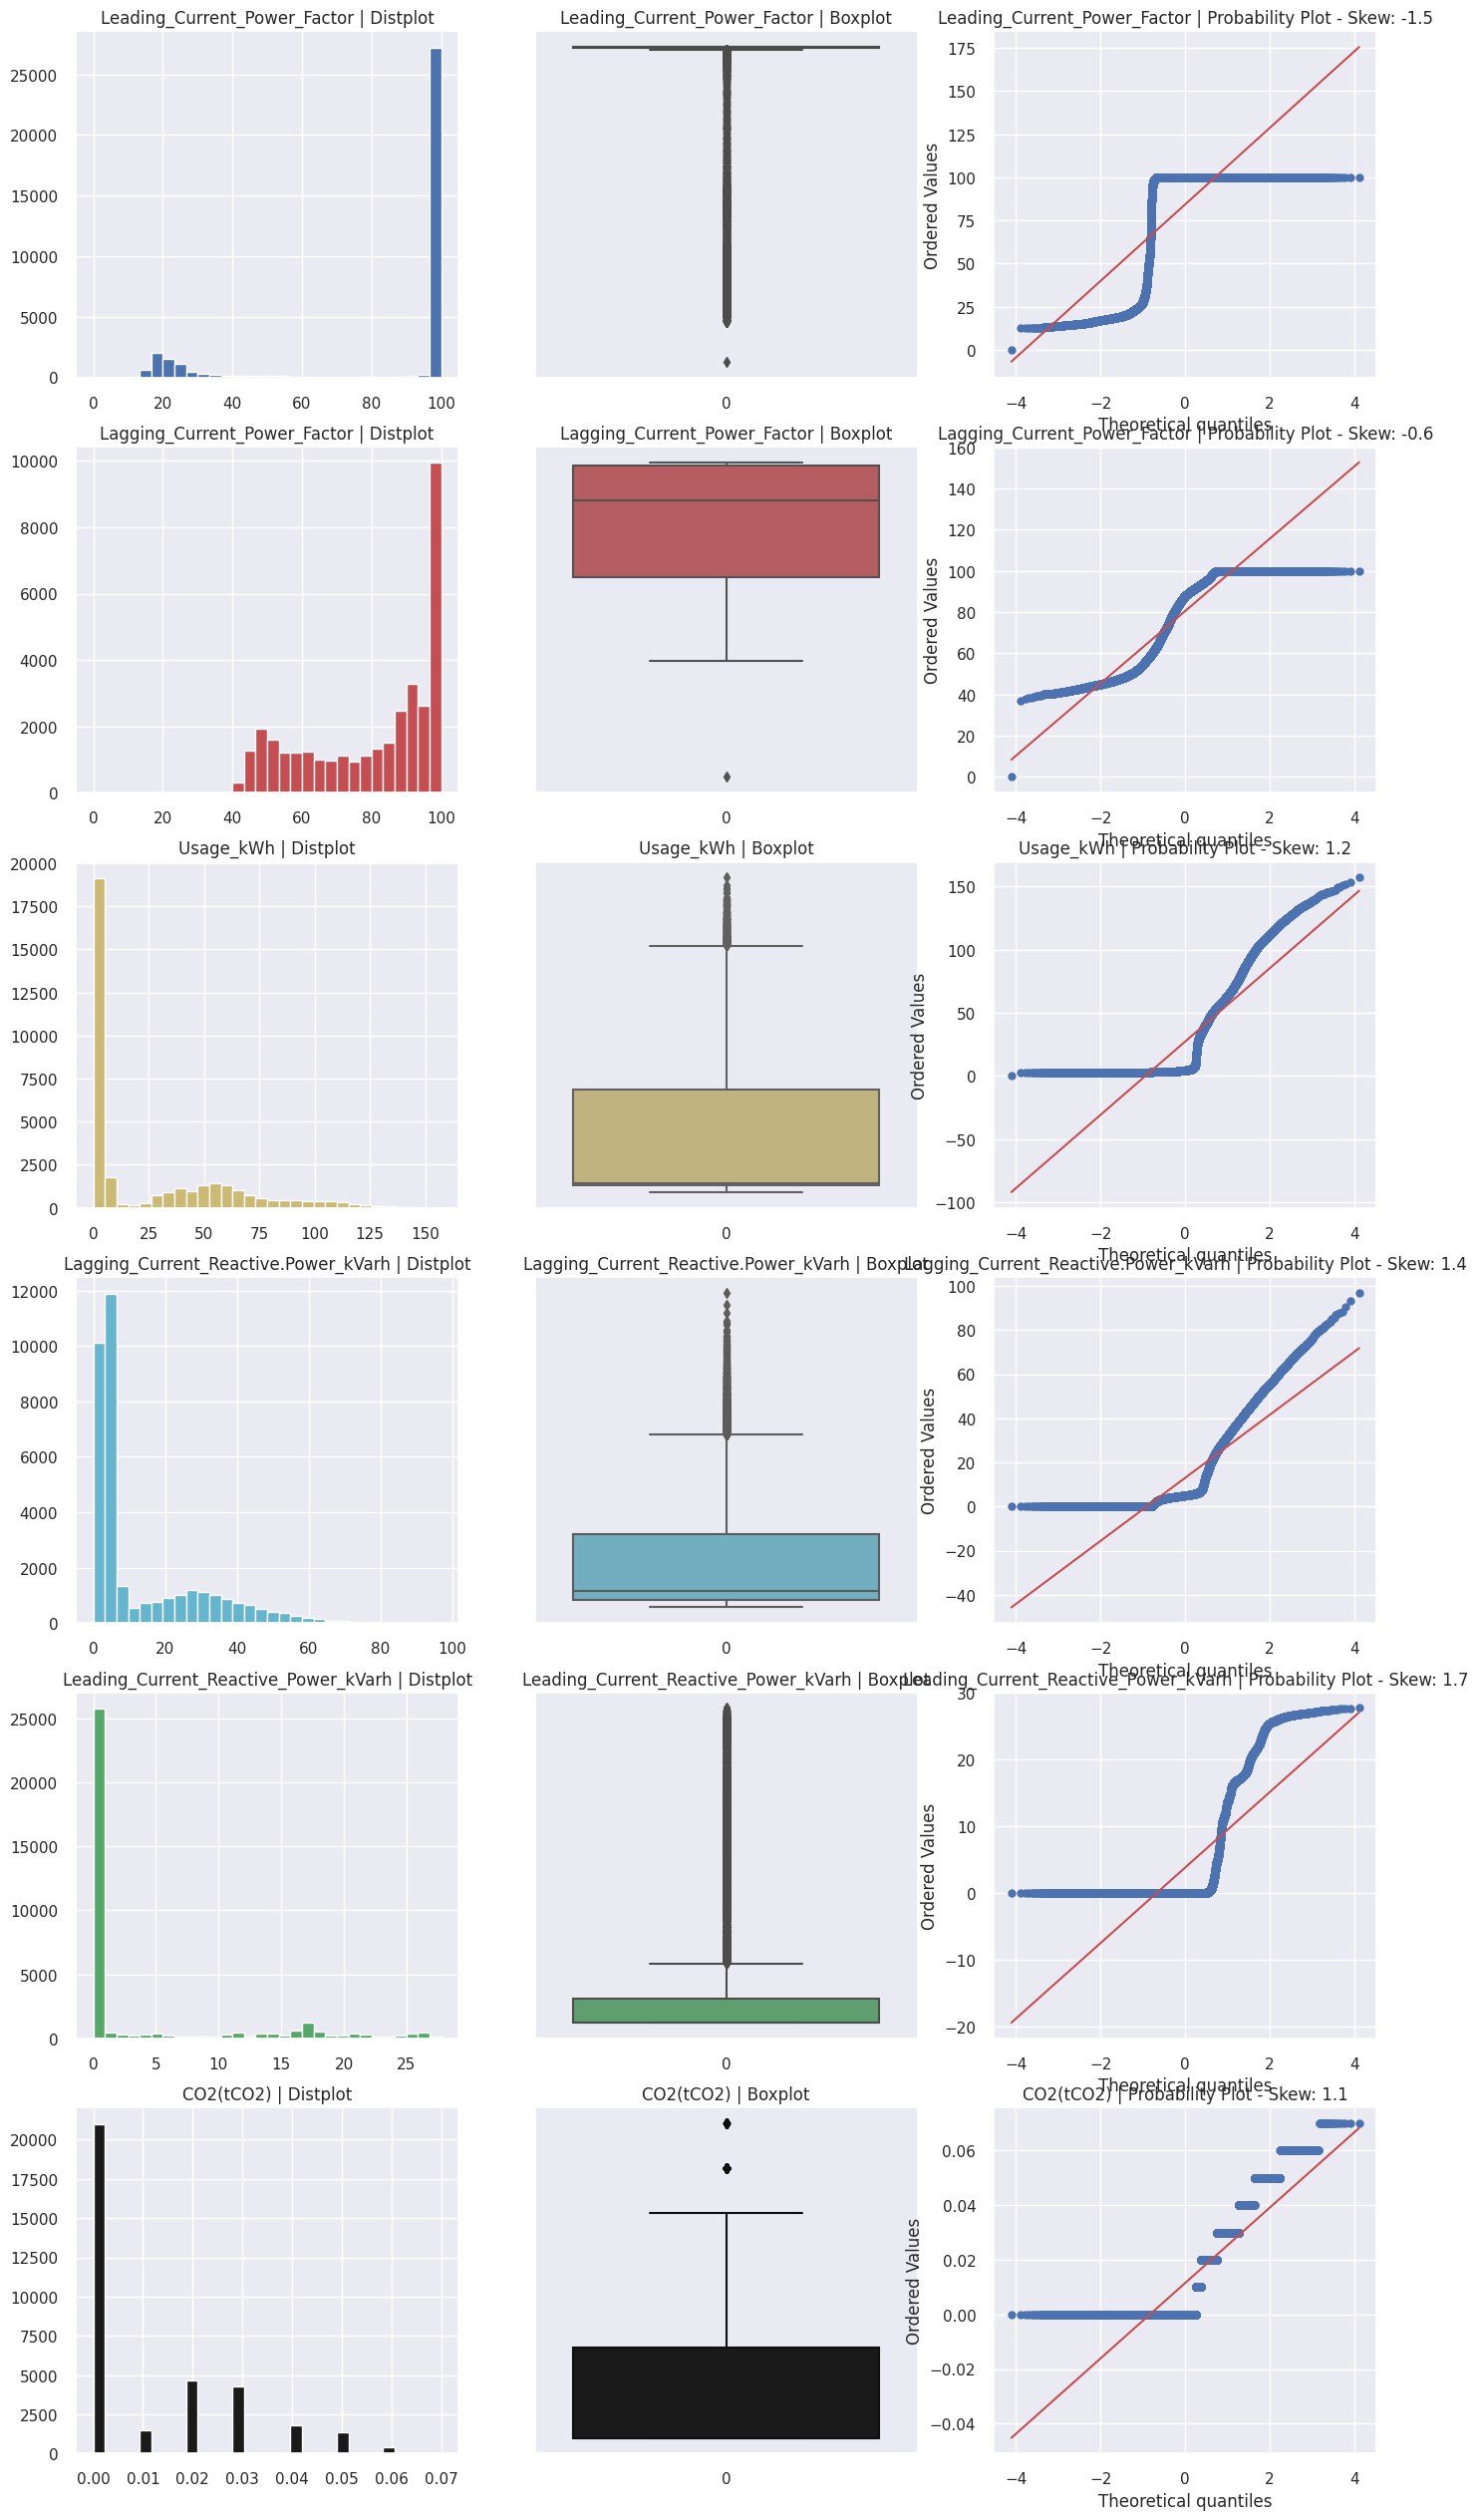

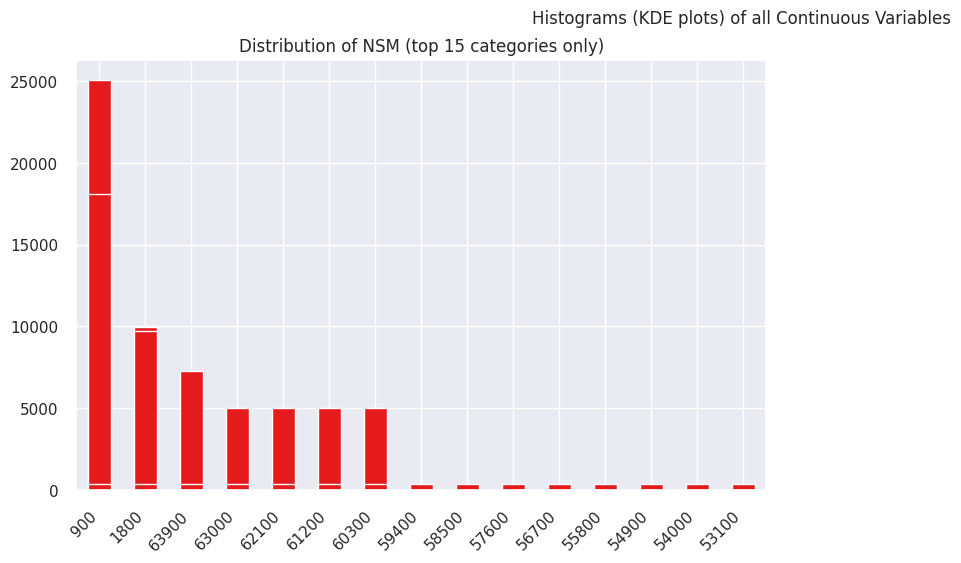

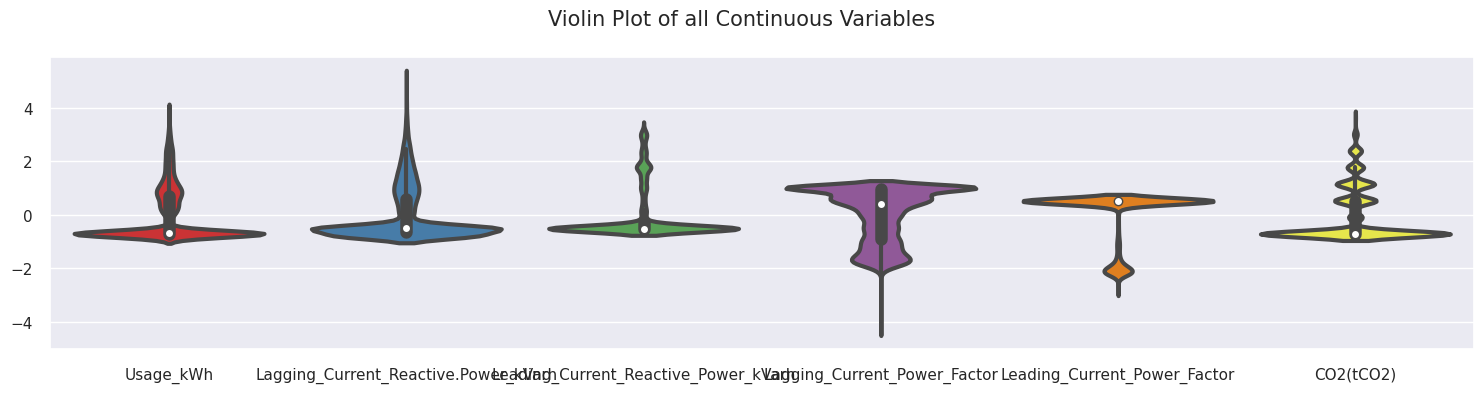

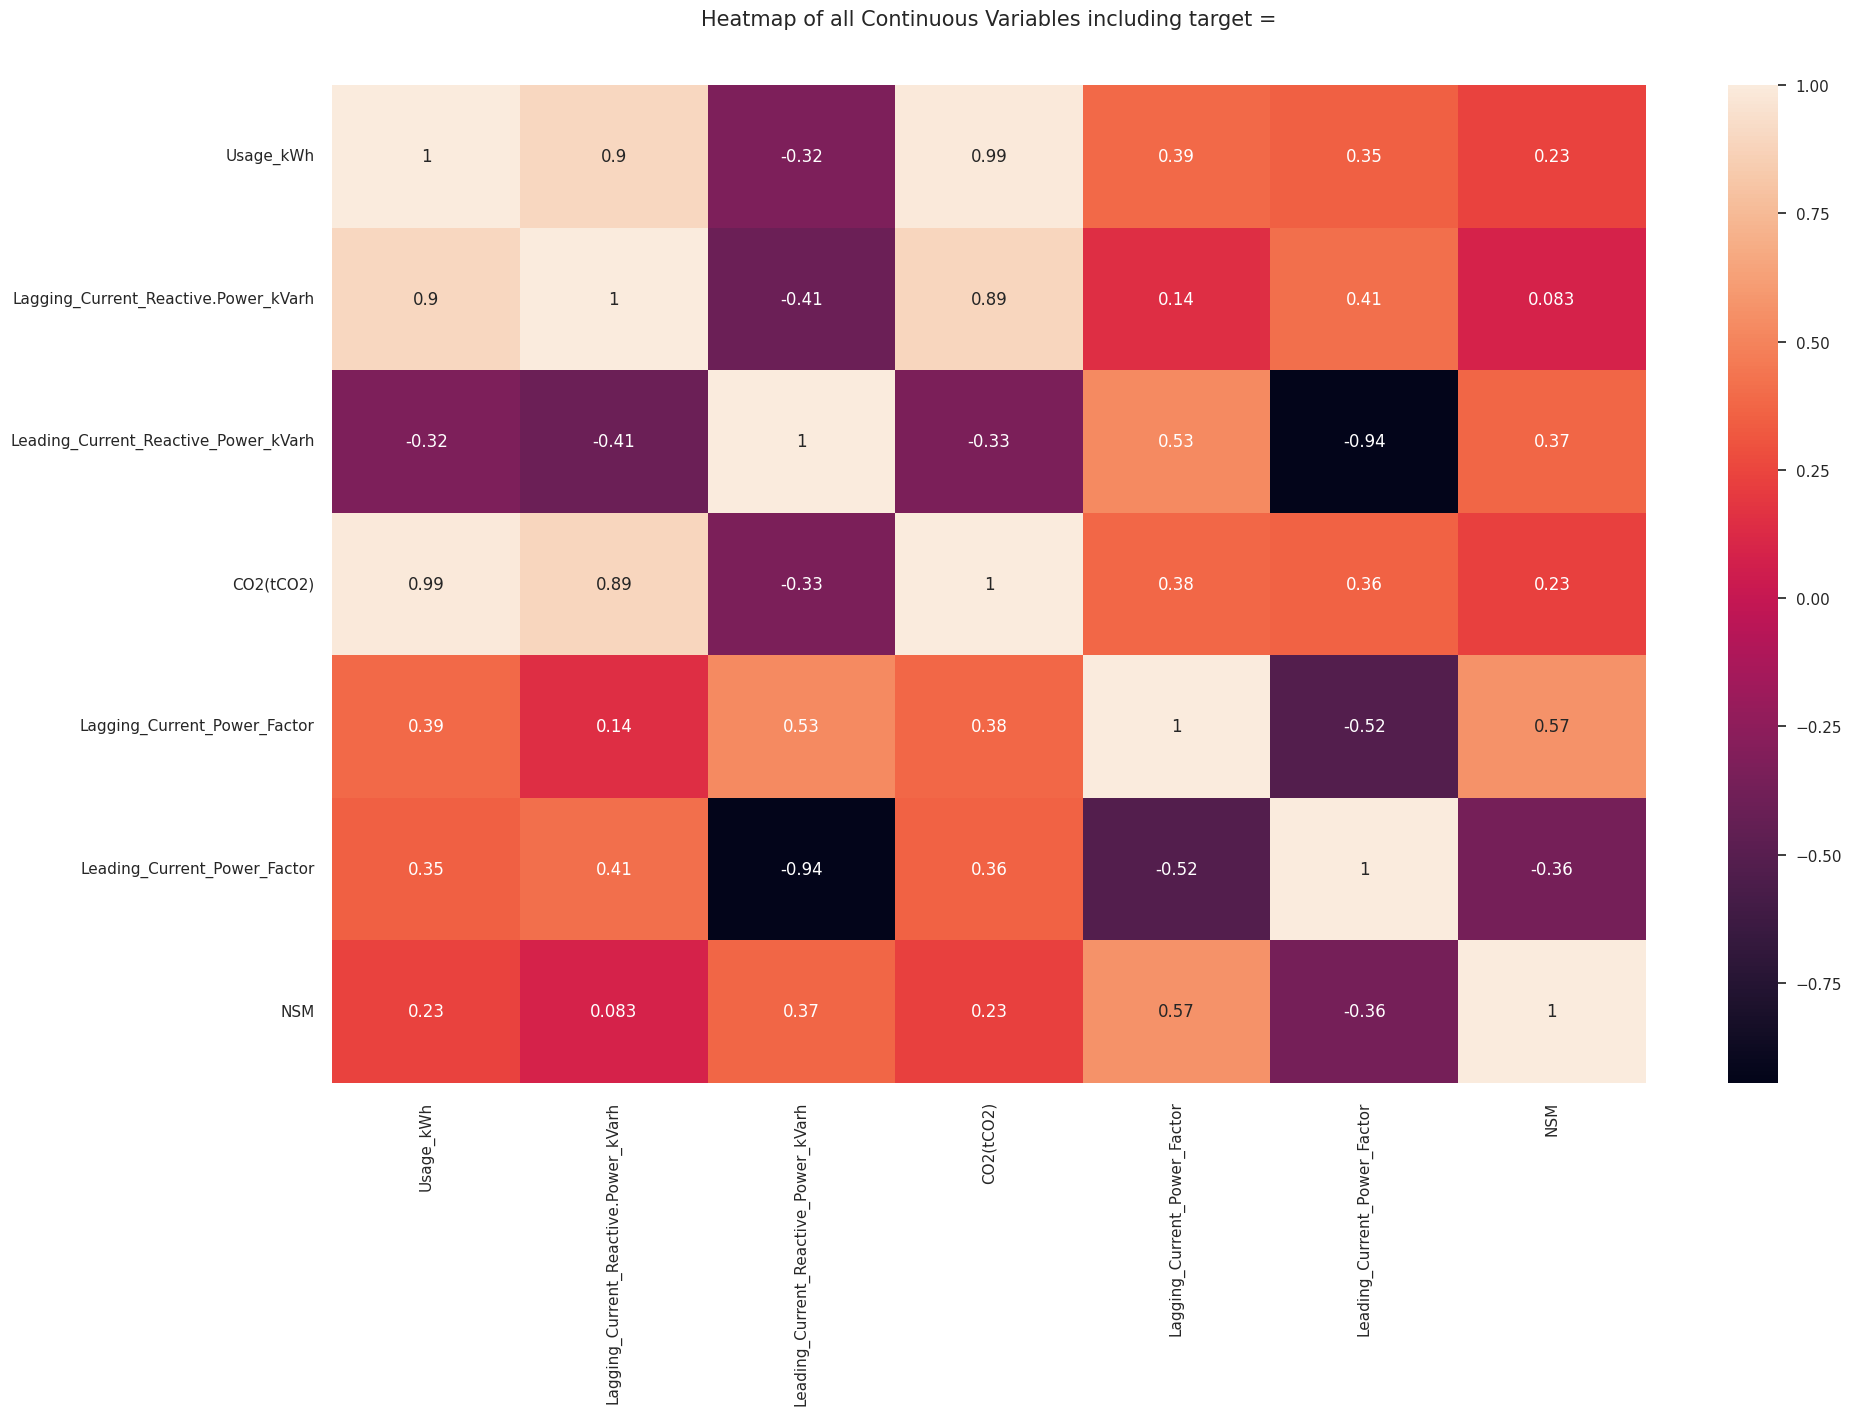

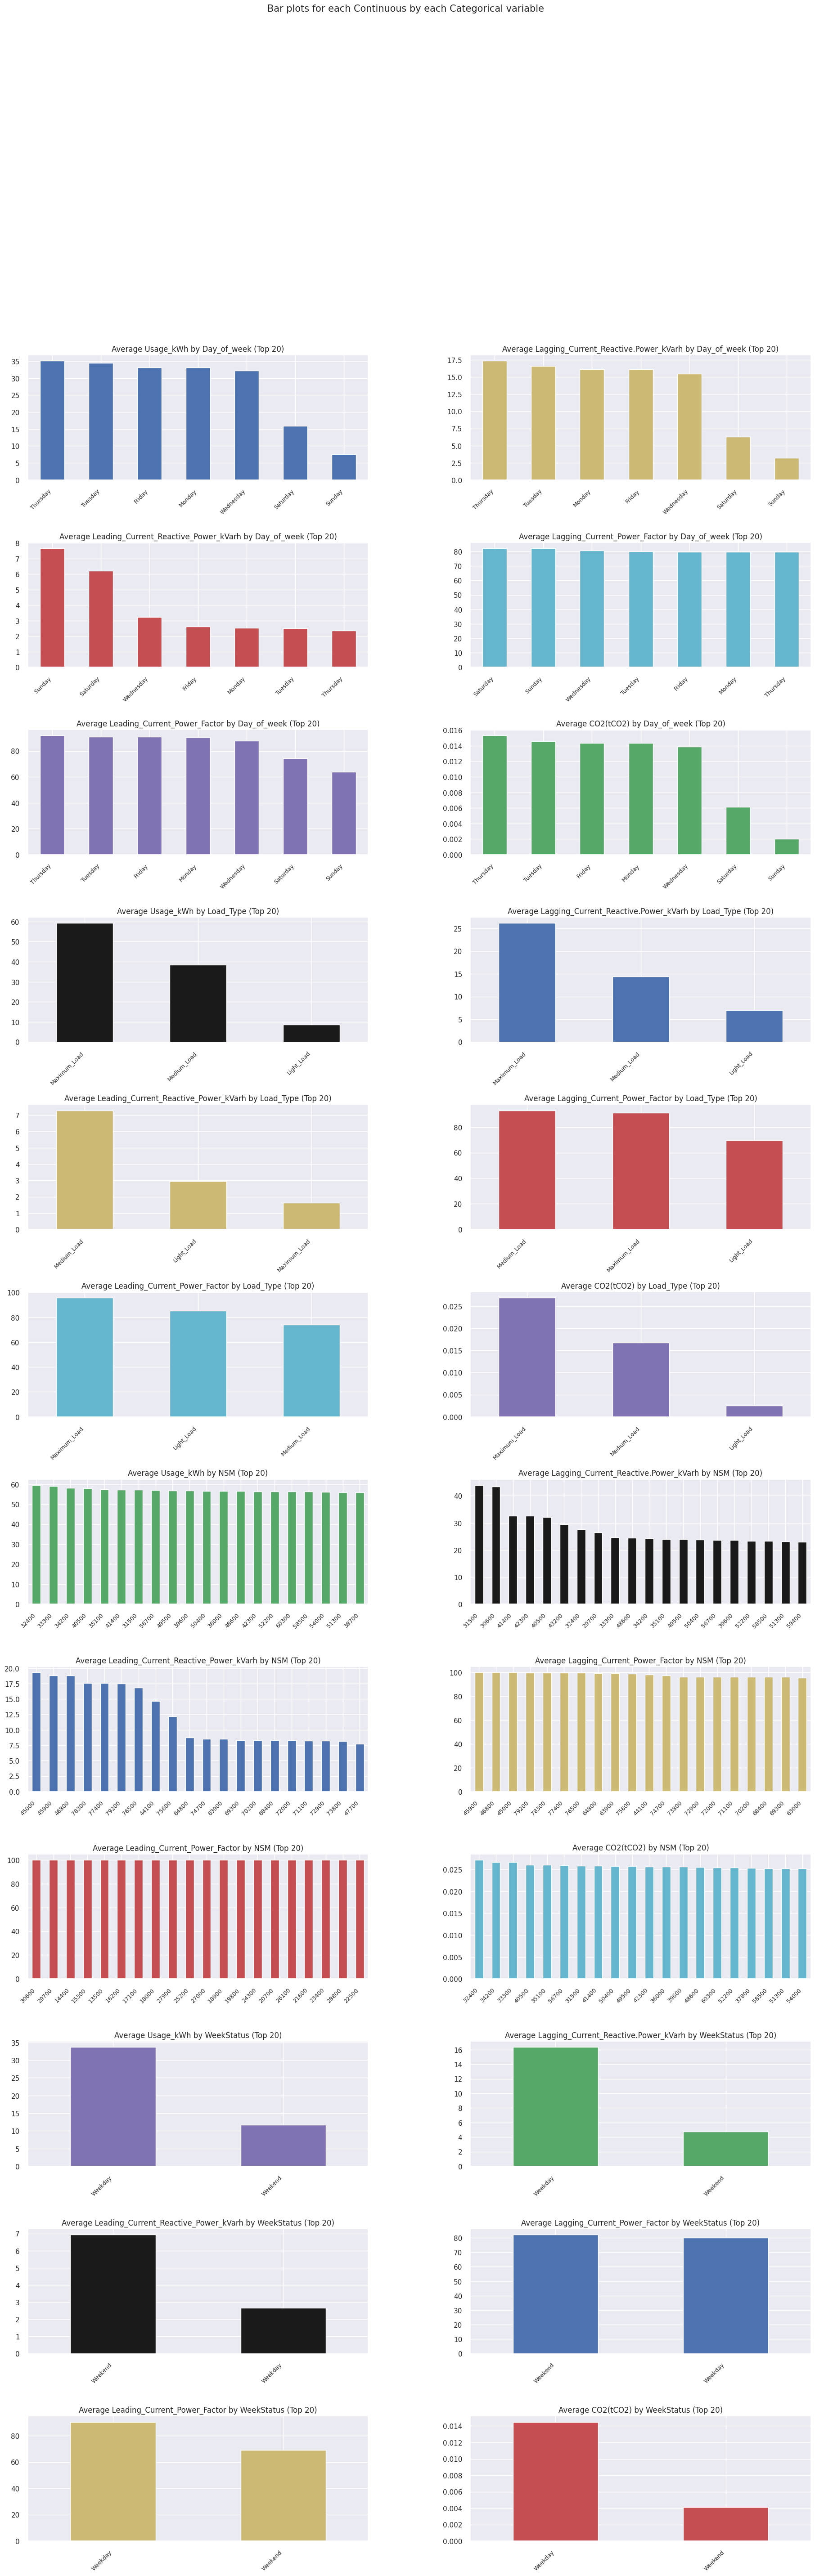

All Plots done
Time to run AutoViz = 35 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [154]:
# here check the piece wice comparisons
df = AV.AutoViz('/content/sample_data/Steel_industry_data.csv')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [156]:
cols = data.select_dtypes(include = "object").columns

In [157]:
cols

Index(['date', 'WeekStatus', 'Day_of_week', 'Load_Type'], dtype='object')

In [158]:
df= data.copy()
df2 = pd.get_dummies(df, prefix=['WeekStatus'], columns=['WeekStatus'])
df2

date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2  \
0                                      0.00  0.0   
1                                      0.00  0.0   
2                                      0.00  0.0   
3                                      0.00  0.0   
4                                      0.00  0.0   
...                                     ...  ...   
35035                                  0.00  0.0   
35036                                  0.00  0.0   
35037                                  0.07  0.0   
35038                                  0.11  0.0   
35039                                  0.07  0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      Day_of_week   Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  
0          Monday  Light_Load                   1                   0  
1          Monday  Light_Load                   1                   0  
2          Monday  Light_Load                   1                   0  
3          Monday  Light_Load                   1                   0  
4          Monday  Light_Load                   1                   0  
...           ...         ...                 ...                 ...  
35035      Monday  Light_Load                   1                   0  
35036      Monday  Light_Load                   1                   0  
35037      Monday  Light_Load                   1                   0  
35038      Monday  Light_Load                   1                   0  
35039      Monday  Light_Load                   1                   0  

[35040 rows x 12 columns]

In [159]:
from sklearn import preprocessing
cols = ['Day_of_week', 'Load_Type']
encoder = preprocessing.LabelEncoder()
df2[cols] = df2[cols].apply(encoder.fit_transform)
df2

date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2  \
0                                      0.00  0.0   
1                                      0.00  0.0   
2                                      0.00  0.0   
3                                      0.00  0.0   
4                                      0.00  0.0   
...                                     ...  ...   
35035                                  0.00  0.0   
35036                                  0.00  0.0   
35037                                  0.07  0.0   
35038                                  0.11  0.0   
35039                                  0.07  0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

       Day_of_week  Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  
0                1          0                   1                   0  
1                1          0                   1                   0  
2                1          0                   1                   0  
3                1          0                   1                   0  
4                1          0                   1                   0  
...            ...        ...                 ...                 ...  
35035            1          0                   1                   0  
35036            1          0                   1                   0  
35037            1          0                   1                   0  
35038            1          0                   1                   0  
35039            1          0                   1                   0  

[35040 rows x 12 columns]

In [160]:
# feature selection

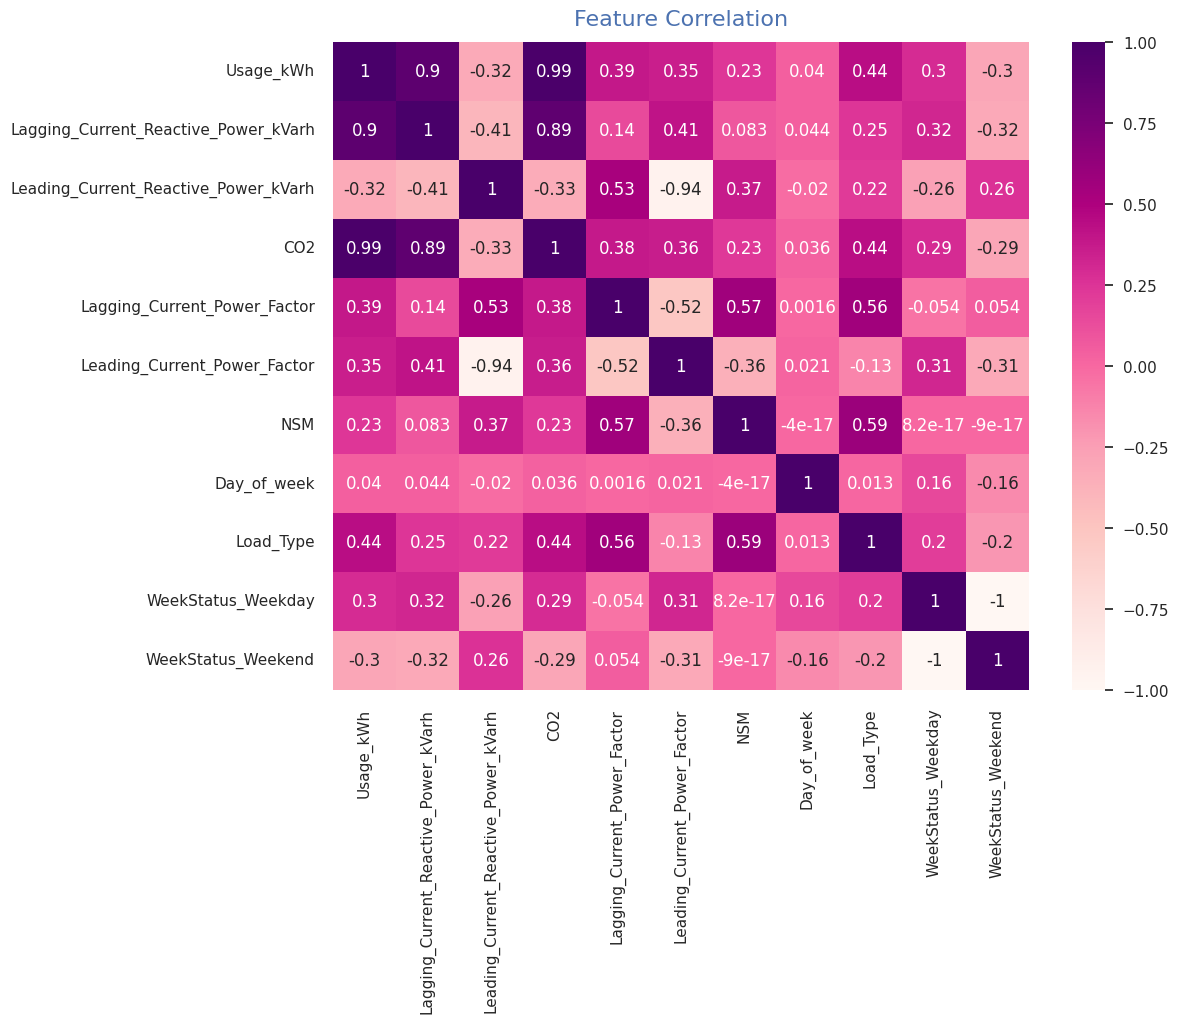

In [161]:
#correlation o the new data
corr_df = df2.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_df, annot = True, cmap = 'RdPu')
plt.title("Feature Correlation", fontsize = 16, color = 'b', pad = 12, loc = 'center')
plt.show()

In [162]:
df2.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Day_of_week', 'Load_Type', 'WeekStatus_Weekday', 'WeekStatus_Weekend'],
      dtype='object')

In [163]:
df3 = df2.drop('Day_of_week', axis=1)

In [164]:
df3.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type', 'WeekStatus_Weekday', 'WeekStatus_Weekend'],
      dtype='object')

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_data, test_data = train_test_split(df3, test_size = 0.25)#75:25%
train_data.shape, test_data.shape

((26280, 11), (8760, 11))

In [166]:
train_data

date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
22917  27/08/2018 17:30      49.97                                 28.84   
24599  14/09/2018 06:00       4.28                                  7.06   
29682  06/11/2018 04:45       3.10                                  5.18   
19400  22/07/2018 02:15       3.28                                  0.00   
30952  19/11/2018 10:15      67.72                                 36.18   
...                 ...        ...                                   ...   
34474  26/12/2018 02:45       4.97                                  4.18   
13058  17/05/2018 00:45       3.49                                  4.82   
7176   16/03/2018 18:15      39.53                                 16.31   
2382   25/01/2018 19:45      71.21                                 23.18   
7040   15/03/2018 08:15      63.18                                 45.90   

       Leading_Current_Reactive_Power_kVarh   CO2  \
22917                                  0.00  0.02   
24599                                  0.00  0.00   
29682                                  0.00  0.00   
19400                                  4.57  0.00   
30952                                  0.00  0.03   
...                                     ...   ...   
34474                                  0.00  0.00   
13058                                  0.00  0.00   
7176                                   0.72  0.02   
2382                                   0.00  0.03   
7040                                   0.00  0.03   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
22917                         86.61                        100.00  63000   
24599                         51.84                        100.00  21600   
29682                         51.35                        100.00  17100   
19400                        100.00                         58.31   8100   
30952                         88.20                        100.00  36900   
...                             ...                           ...    ...   
34474                         76.53                        100.00   9900   
13058                         58.65                        100.00   2700   
7176                          92.44                         99.98  65700   
2382                          95.09                        100.00  71100   
7040                          80.90                        100.00  29700   

       Load_Type  WeekStatus_Weekday  WeekStatus_Weekend  
22917          2                   1                   0  
24599          0                   1                   0  
29682          0                   1                   0  
19400          0                   0                   1  
30952          1                   1                   0  
...          ...                 ...                 ...  
34474          0                   1                   0  
13058          0                   1                   0  
7176           2                   1                   0  
2382           1                   1                   0  
7040           0                   1                   0  

[26280 rows x 11 columns]

In [167]:
X_train = train_data.drop(columns=['Usage_kWh','date'], axis = 1)
y_train = train_data['Usage_kWh']
X_test = test_data.drop(columns=['Usage_kWh','date'], axis = 1)
y_test = test_data['Usage_kWh']

In [168]:
size = X_train.shape

In [169]:
y_test

19257     54.43
24598      3.64
11608      3.10
9030       3.06
23573     46.26
          ...  
16761     28.01
21675    108.36
12046      3.02
2069      84.92
34235      3.67
Name: Usage_kWh, Length: 8760, dtype: float64

In [170]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

In [171]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [172]:
import statsmodels.api as sm
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -10.53953212147157
Coefficients: 
 [ 2.89979894e-01  7.21181766e-02  1.69215666e+03  1.12687692e-01
  5.66777028e-02 -1.82776857e-06  7.53330851e-01  2.03044653e-03
 -2.03044656e-03]
                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.722e+05
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:40:10   Log-Likelihood:                -77192.
No. Observations:               26280   AIC:                         1.544e+05
Df Residuals:                   26271   BIC:                         1.545e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
              

In [173]:
y_pred = regr.predict(X_test)
print(f"Mean Squared Error: {mse(y_pred, y_test)}")

Mean Squared Error: 25.354691702751236


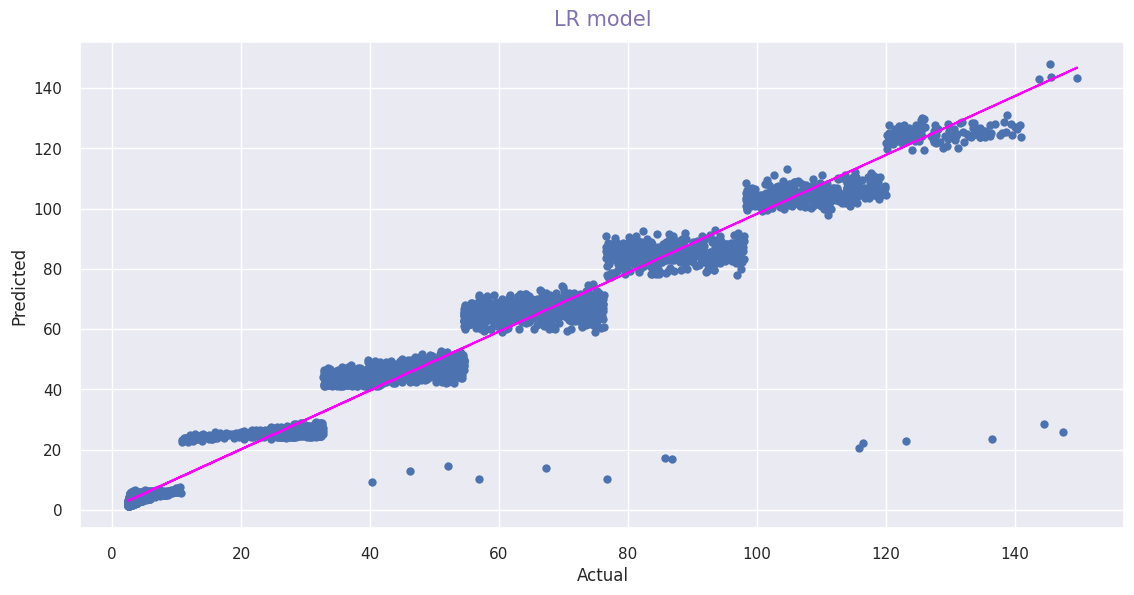

In [174]:

plt.title('LR model', fontsize = 15, color = 'm', pad = 12)
plt.plot(y_test,y_pred, 'o', color = 'b')

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m * y_test + b, color = 'magenta')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()